In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/globa_superstore.csv', encoding='unicode_escape')

data.head()

,Unnamed: 0,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Discount,Profit,Shipping Cost,Order Priority,order year,order_month,ship year,ship_month,unit_price,Regular_price
0,0,32298,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,0.0,762.1845,933.57,Critical,2012,7,2012,7,329.950,329.95
1,1,26341,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,0.1,-288.7650,923.63,Critical,2013,2,2013,2,412.155,457.95
2,2,25330,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,0.1,919.9710,915.49,Medium,2013,10,2013,10,575.019,638.91
3,3,13524,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,0.1,-96.5400,910.16,Medium,2013,1,2013,1,578.502,642.78
4,4,47221,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,0.0,311.5200,903.04,Critical,2013,11,2013,11,354.120,354.12


In [ ]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
data_arima = data.copy(deep=True)

In [ ]:
data.columns

Index(['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'order year', 'order_month', 'ship year',
       'ship_month', 'unit_price', 'Regular_price'],
      dtype='object')

Now we need to clean the data and leave only the columns usuful and appropriate for clustering

In [ ]:
#data.drop(['Row ID','Customer ID', 'Customer Name', 'Product ID'], axis = 1, inplace = True)
data.drop(['Row ID', 'Customer Name', 'Product ID'], axis = 1, inplace = True)

In [ ]:
data = data.dropna()

In [ ]:
data['Ship Mode'].unique()

array(['Same Day', 'Second Class', 'First Class', 'Standard Class'],
      dtype=object)

In [ ]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
data['City'].unique().size

3095

In [ ]:
data['Market'].unique()

array(['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'],
      dtype=object)

In [ ]:
data['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [ ]:
data['Sub-Category'].unique()

array(['Accessories', 'Chairs', 'Phones', 'Copiers', 'Tables', 'Binders',
       'Supplies', 'Appliances', 'Machines', 'Bookcases', 'Storage',
       'Furnishings', 'Art', 'Paper', 'Envelopes', 'Fasteners', 'Labels'],
      dtype=object)

In [ ]:
data['Order Priority'].unique()

array(['Critical', 'Medium', 'High', 'Low'], dtype=object)

In [ ]:
data.drop(['City', 'State', 'Country','Product Name'], axis = 1, inplace = True)

In [ ]:
data['Region'].unique()

array(['East', 'Oceania', 'Central', 'Africa', 'West', 'South',
       'Central Asia', 'EMEA', 'North Asia', 'North', 'Caribbean',
       'Southeast Asia', 'Canada'], dtype=object)

In [ ]:
data.drop(['Ship Date'], axis = 1, inplace = True)

In [ ]:
data.drop(['Order Date'], axis = 1, inplace = True)

In [ ]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Ship Mode', 'Region', 'Segment', 'Market', 'Sub-Category', 'Category', 'Order Priority'])

In [ ]:
add_data5 = one_hot_encoded_data.groupby(['Customer ID'])

In [ ]:
add_data5 = add_data5.sum().round(2).reset_index()

In [ ]:
add_data6 = add_data5.mean().round(2).reset_index()

In [ ]:
add_data5.drop('Customer ID', axis = 1, inplace = True)

In [ ]:
add_data6.drop('Customer ID', axis = 1, inplace = True)

In [ ]:
add_data5.drop(['order year', 'order_month', 'ship year','ship_month'], axis = 1, inplace = True)

# K-means clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = add_data5.copy(deep = True)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
# normalize
X = scaler.fit_transform(add_data5)

In [ ]:
distortions = []
K = range(1,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=500, n_init=20, random_state=7).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    print('{} / {}'.format(k,K[-1]))

1 / 15
2 / 15
3 / 15
4 / 15
5 / 15
6 / 15
7 / 15
8 / 15
9 / 15
10 / 15
11 / 15
12 / 15
13 / 15
14 / 15
15 / 15


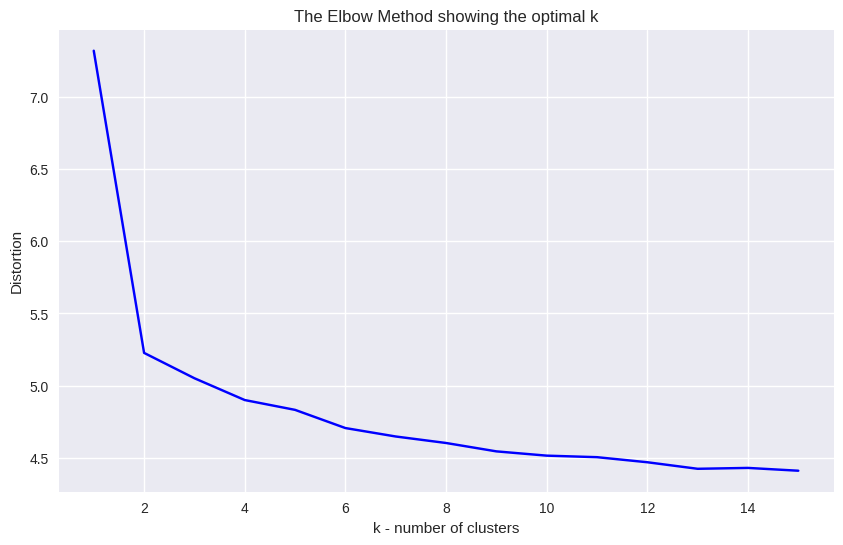

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k - number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.legend(); plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [ ]:
results_db_kmeans = {}
for i in range(2, 16):

    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X)

    db_index = davies_bouldin_score(X, labels)
    results_db_kmeans.update({i: db_index})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<ipython-input-56-d26e2bacd728>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


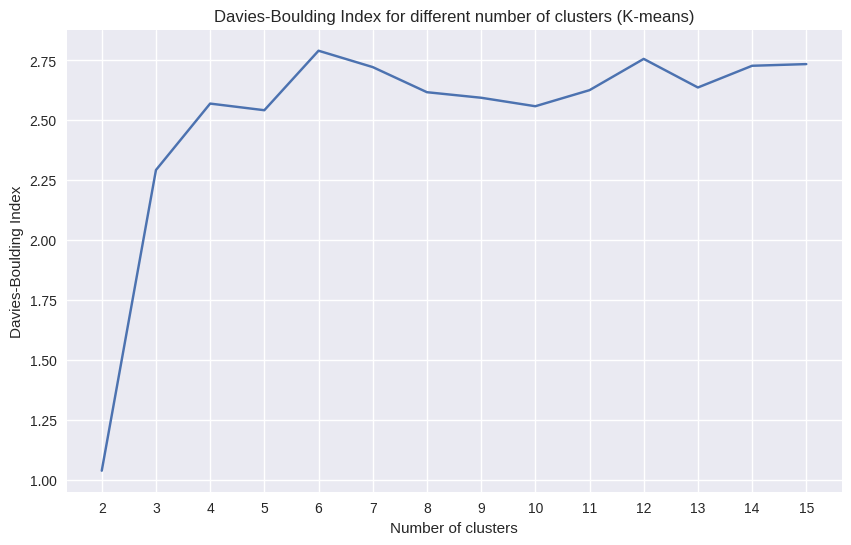

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

plt.plot(list(results_db_kmeans.keys()), list(results_db_kmeans.values()))

plt.xticks(np.arange(2, 16, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (K-means)')
plt.show()

In [ ]:
results_sil_kmeans = {}
for i in range(2, 16):

    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X)

    sil_score = silhouette_score(X, labels)
    results_sil_kmeans.update({i: sil_score})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

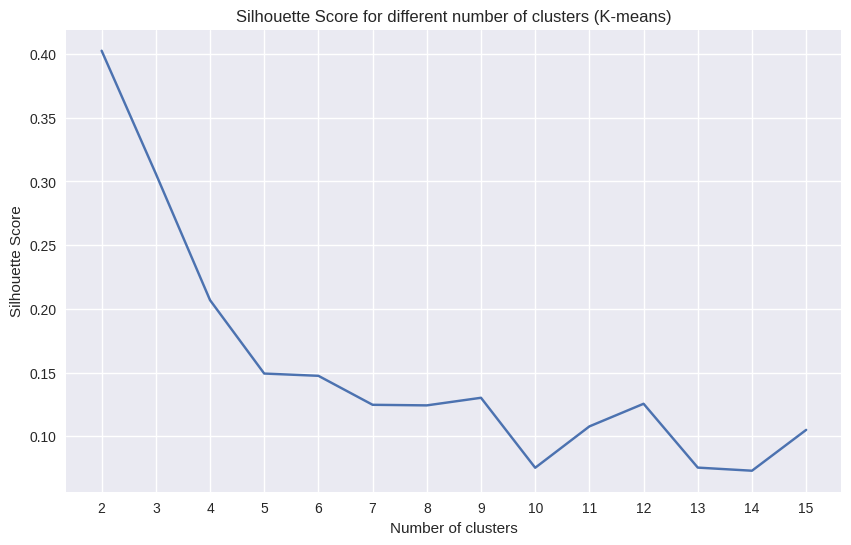

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_kmeans.keys()), list(results_sil_kmeans.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 16, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (K-means)')
plt.show()

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(one_hot_encoded_data)
    kmeanModel.fit(one_hot_encoded_data)

    distortions.append(sum(np.min(cdist(one_hot_encoded_data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / one_hot_encoded_data.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(one_hot_encoded_data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / one_hot_encoded_data.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(add_data5)
    kmeanModel.fit(add_data5)

    distortions.append(sum(np.min(cdist(add_data5, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / add_data5.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(add_data5, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / add_data5.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 6598.599291999254
2 : 2999.2163814366036
3 : 2255.7734601386196
4 : 1907.3346645939457
5 : 1708.9925795714485
6 : 1506.3277951191387
7 : 1415.500082636619
8 : 1294.7927662661316
9 : 1221.6200992135098
10 : 1192.32690923982
11 : 1156.127104459744
12 : 1120.834126839482
13 : 1073.6475640668568
14 : 1056.1495214537276
15 : 1036.270990466181
16 : 1025.6158349787174
17 : 998.7439899534215
18 : 975.3301489420593
19 : 968.0512085746981


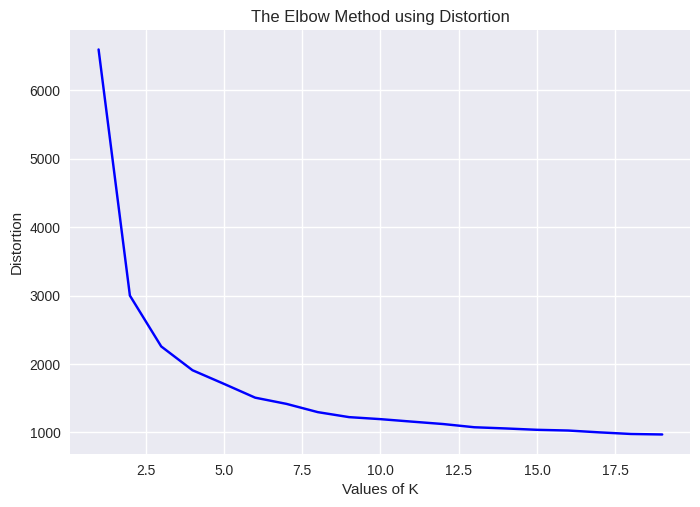

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 466.8566564553048
2 : 339.76212363212943
3 : 281.24875598397773
4 : 265.11446375226404
5 : 233.17540648339852
6 : 223.9912075773163
7 : 217.4982285503723
8 : 200.6144890222105
9 : 197.30984834472858
10 : 193.83721544263076
11 : 180.2649906631497
12 : 179.79628506663394
13 : 173.24321906022016
14 : 172.22211693040902
15 : 169.62219728837357
16 : 160.8268912518018
17 : 158.3839851119352
18 : 156.9718223938716
19 : 155.60604282076514


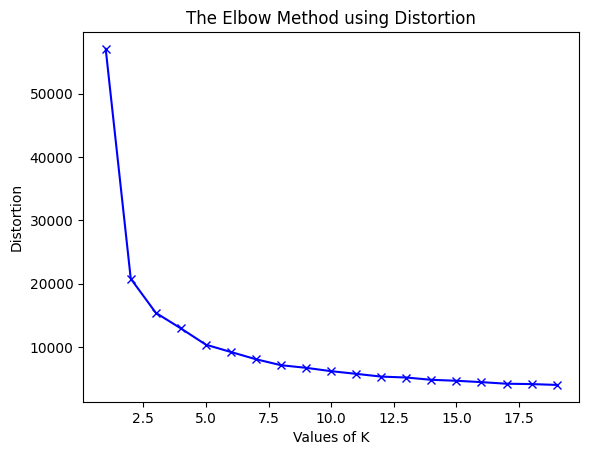

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:

km_silhouette = []
for i in range(2,20):
    km = KMeans(n_clusters=i, random_state=0).fit(add_data5)
    preds = km.predict(add_data5)

    silhouette = silhouette_score(add_data5,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 2: 0.6580423996029231


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 3: 0.6179673568619706


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 4: 0.5767967435765943


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 5: 0.5309347090428751


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 6: 0.47769316644506093


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 7: 0.4614329477360436


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 8: 0.4191401008818515


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 9: 0.4049007724575561


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 10: 0.36911167947180373


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 11: 0.36900042240744607


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 12: 0.36370647033445724


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 13: 0.3375462450618515


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 14: 0.3291230109305013


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 15: 0.3284217578047777


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 16: 0.32297228627191454


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 17: 0.3061745620743989


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 18: 0.3177315313132239


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 19: 0.30208405707068947


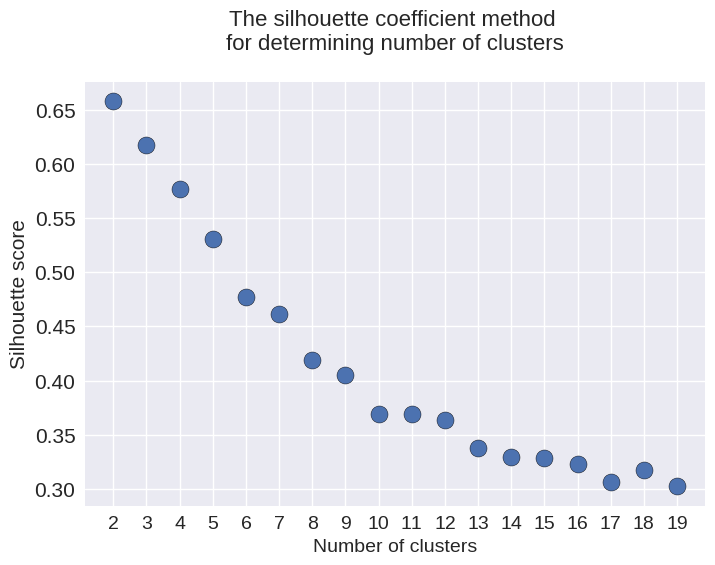

In [ ]:
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,20)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,20)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=9).fit(add_data5)
kmeanModel.fit(add_data5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

In [ ]:
unique, counts = np.unique(kmeanModel.labels_, return_counts=True)

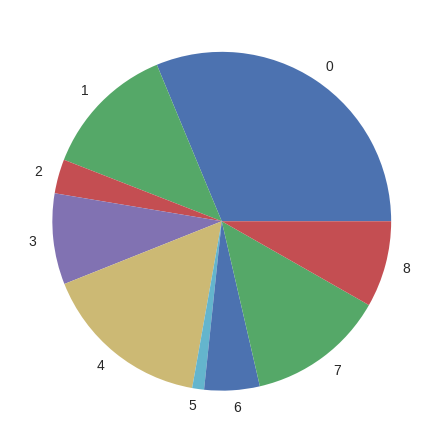

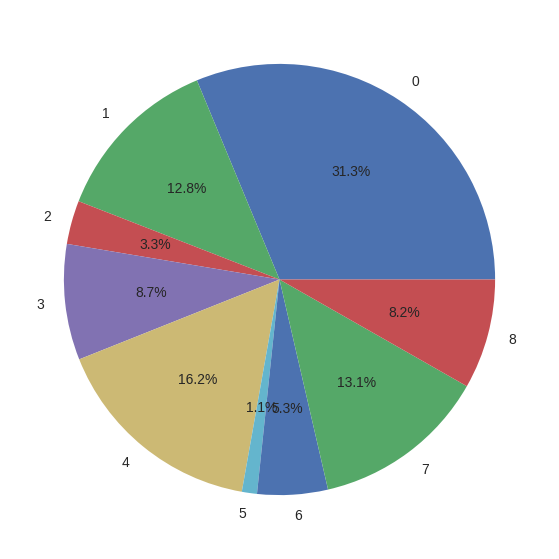

In [ ]:
fig, ax = plt.subplots()
ax.pie(counts, labels=unique)
fig = plt.figure(figsize =(10, 7))
plt.pie(counts, labels=unique, autopct='%1.1f%%')

plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=11).fit(add_data5)
kmeanModel.fit(add_data5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=11)

In [ ]:
from collections import Counter
Counter(kmeanModel.labels_)

Counter({5: 186,
         6: 122,
         9: 126,
         3: 295,
         8: 318,
         0: 90,
         4: 46,
         2: 201,
         1: 160,
         7: 18,
         10: 28})

In [ ]:
kmeanModel.labels_

array([5, 6, 9, ..., 7, 3, 2], dtype=int32)

In [ ]:
unique, counts = np.unique(kmeanModel.labels_, return_counts=True)

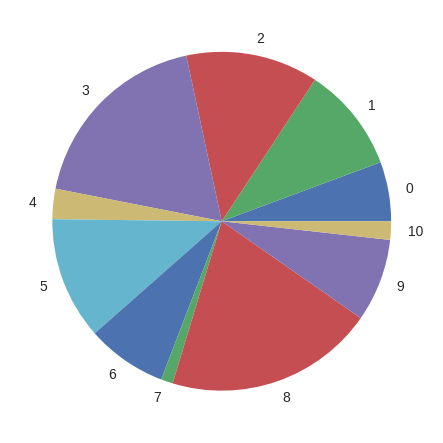

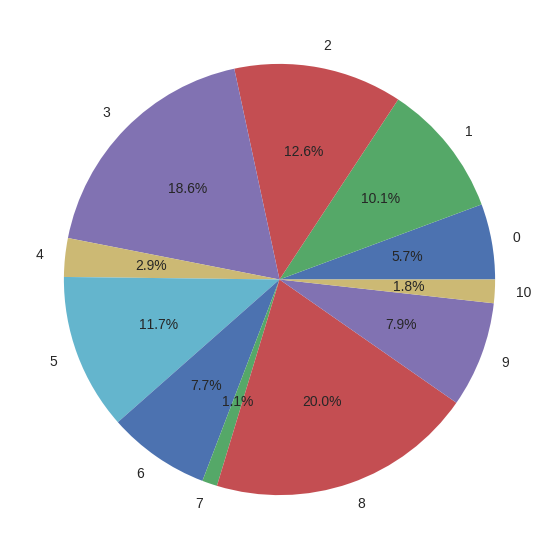

In [ ]:
fig, ax = plt.subplots()
ax.pie(counts, labels=unique)
fig = plt.figure(figsize =(10, 7))
plt.pie(counts, labels=unique, autopct='%1.1f%%')

plt.show()

# Unnecessary experimants with K-means

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(add_data6)
    kmeanModel.fit(add_data6)

    distortions.append(sum(np.min(cdist(add_data6, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / add_data6.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(add_data6, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / add_data6.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

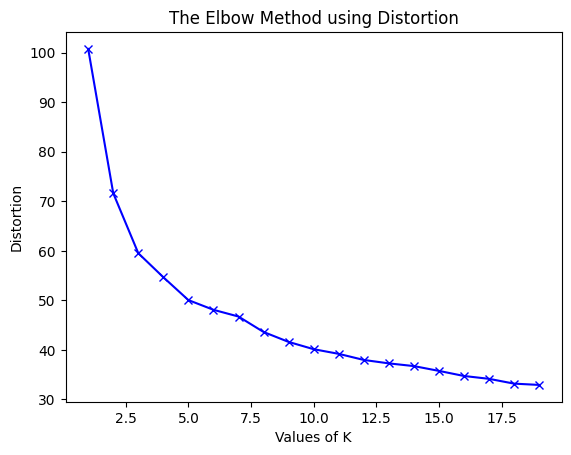

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:

km_silhouette = []
for i in range(2,20):
    km = KMeans(n_clusters=i, random_state=0).fit(add_data6)
    preds = km.predict(add_data6)

    silhouette = silhouette_score(add_data6,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 2: 0.4292965989618806


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 3: 0.4106270326748746


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 4: 0.36623592549268535


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 5: 0.31201383107458386


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 6: 0.3221474210231252


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 7: 0.3311175132313196


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 8: 0.3168837713120231


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 9: 0.3264940692917412


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 10: 0.29346461523621115


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 11: 0.29948973055830547


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 12: 0.29490759738358124


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 13: 0.278586084282186


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 14: 0.28397681401397284


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 15: 0.2869109242538919


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 16: 0.2650713898900375


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 17: 0.27365431249879174


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 18: 0.25605479989452296


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 19: 0.25917926122806595


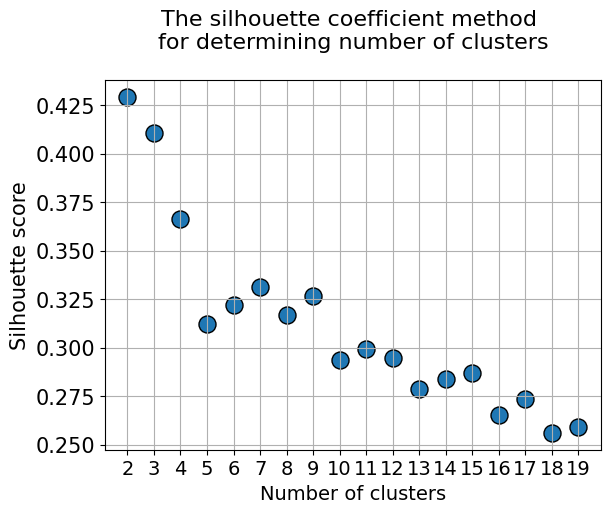

In [ ]:
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,20)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,20)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=7).fit(add_data6)
kmeanModel.fit(add_data6)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [ ]:
Counter(kmeanModel.labels_)

Counter({2: 289, 4: 382, 6: 53, 0: 506, 5: 88, 1: 263, 3: 9})

In [ ]:
unique, counts = np.unique(kmeanModel.labels_, return_counts=True)

([<matplotlib.patches.Wedge at 0x7ad8d1cd55a0>,
 [Text(0.5945386427675556, 0.9254857115353607, '0'),
  Text(-0.8937356048893618, 0.6412773725565614, '1'),
  Text(-0.9815829056231148, -0.4964826274790322, '2'),
  Text(-0.5405620006185826, -0.9580149912643516, '3'),
  Text(0.2815507425632151, -1.0633575030826192, '4'),
  Text(1.0201734469597221, -0.4113953550033339, '5'),
  Text(1.0939740950424461, -0.11498121314397867, '6')])

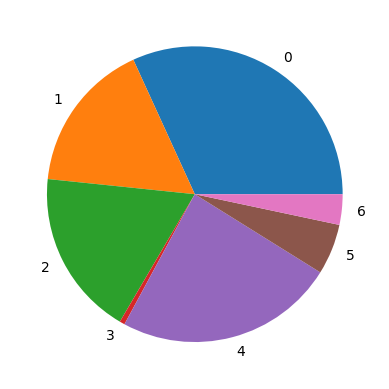

In [ ]:
fig, ax = plt.subplots()
ax.pie(counts, labels=unique)

In [ ]:
kmeanModel = KMeans(n_clusters=14).fit(one_hot_encoded_data)
kmeanModel.fit(one_hot_encoded_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=14)

In [ ]:
Counter(kmeanModel.labels_)

Counter({1: 343,
         12: 153,
         4: 57,
         11: 738,
         6: 77,
         7: 12,
         2: 1391,
         3: 613,
         5: 2378,
         9: 1177,
         8: 2,
         13: 5797,
         0: 9464,
         10: 1})

In [ ]:
unique, counts = np.unique(kmeanModel.labels_, return_counts=True)

([<matplotlib.patches.Wedge at 0x784608aa9750>,
 [Text(0.2525919688663561, 1.0706060420454473, '0'),
  Text(-1.0066897564688426, 0.44336862115028236, '1'),
  Text(-1.0842343162680523, 0.18556925237428, '2'),
  Text(-1.0928544101768718, -0.12517682755590898, '3'),
  Text(-1.0760980946331735, -0.22806334805674838, '4'),
  Text(-0.9358263986119036, -0.5781253771121577, '5'),
  Text(-0.6831235190860695, -0.862172985932327, '6'),
  Text(-0.6722123209426779, -0.8707069516047626, '7'),
  Text(-0.6704862050929119, -0.8720368391186842, '8'),
  Text(-0.5163775155994444, -0.9712642592947327, '9'),
  Text(-0.3480792879667703, -1.0434753515481554, '10'),
  Text(-0.2372667840549346, -1.0741063602754755, '11'),
  Text(-0.10032827079496881, -1.095415098526258, '12'),
  Text(0.750249393594736, -0.8044413262698101, '13')])

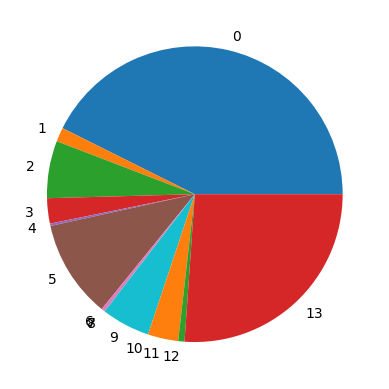

In [ ]:
fig, ax = plt.subplots()
ax.pie(counts, labels=unique)

In [ ]:
kmeanModel = KMeans(n_clusters=5).fit(one_hot_encoded_data)
kmeanModel.fit(one_hot_encoded_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
Counter(kmeanModel.labels_)

Counter({3: 1679, 1: 433, 4: 12, 0: 5262, 2: 14817})

In [ ]:
unique, counts = np.unique(kmeanModel.labels_, return_counts=True)

([<matplotlib.patches.Wedge at 0x784606647610>,
 [Text(0.8089383634544307, 0.7453983660645277, '0'),
  Text(0.022488943549062473, 1.0997700884357817, '1'),
  Text(-0.9281380789277014, -0.5903894531954278, '2'),
  Text(1.0682190989463296, -0.2625032507347137, '3'),
  Text(1.0999984142681365, -0.001867781460830907, '4')])

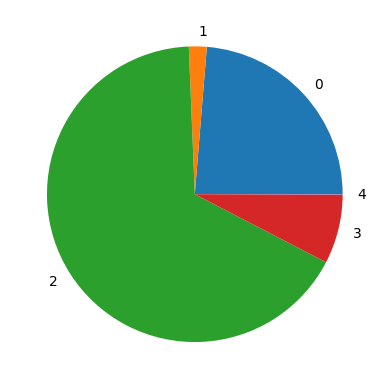

In [ ]:
fig, ax = plt.subplots()
ax.pie(counts, labels=unique)

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler()
# normalize
X = scaler.fit_transform(add_data5)

# EM clusterisation

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
X1 = add_data5

In [ ]:
results_sil_em = {}
for i in range(2, 14):

    gmm = GaussianMixture(n_components = i)
    labels = gmm.fit_predict(X)

    sil_score = metrics.silhouette_score(X, labels)
    results_sil_em.update({i: sil_score})
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_em.keys()), list(results_sil_em.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 14, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (EM)')
plt.show()

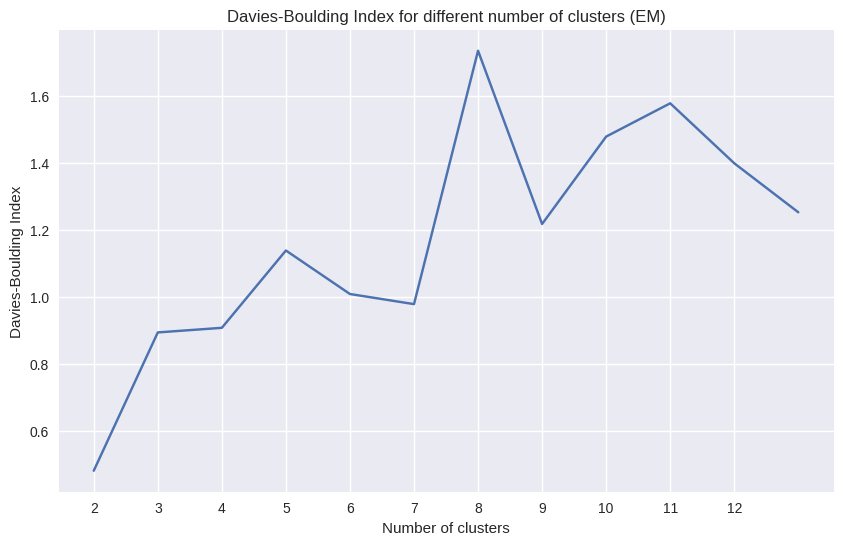

In [ ]:
results_ch_em = {}
for i in range(2, 14):

    gm = GaussianMixture(n_components = i)
    labels = gm.fit_predict(X)

    ch_score = metrics.davies_bouldin_score(X, labels)
    results_ch_em.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_em.keys()), list(results_ch_em.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 13, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (EM)')
plt.show()

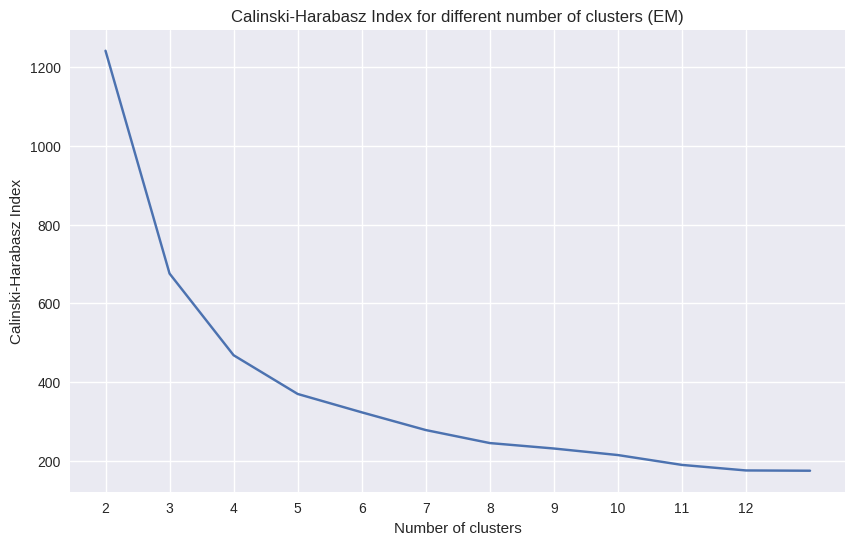

In [ ]:
results_ch_em = {}
for i in range(2, 14):

    gm = GaussianMixture(n_components = i)
    labels = gm.fit_predict(X)

    ch_score = metrics.calinski_harabasz_score(X, labels)
    results_ch_em.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_em.keys()), list(results_ch_em.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 13, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (EM)')
plt.show()

In [ ]:
from sklearn import preprocessing
import pandas as pd

In [ ]:
scaler = preprocessing.StandardScaler()
# normalize
X = scaler.fit_transform(add_data5.iloc[:,1:])

In [ ]:
add_data5.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'unit_price', 'Regular_price', 'Ship Mode_First Class',
       'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Region_Africa', 'Region_Canada',
       'Region_Caribbean', 'Region_Central', 'Region_Central Asia',
       'Region_EMEA', 'Region_East', 'Region_North', 'Region_North Asia',
       'Region_Oceania', 'Region_South', 'Region_Southeast Asia',
       'Region_West', 'Segment_Consumer', 'Segment_Corporate',
       'Segment_Home Office', 'Market_APAC', 'Market_Africa', 'Market_Canada',
       'Market_EMEA', 'Market_EU', 'Market_LATAM', 'Market_US',
       'Sub-Category_Accessories', 'Sub-Category_Appliances',
       'Sub-Category_Art', 'Sub-Category_Binders', 'Sub-Category_Bookcases',
       'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Envelopes',
       'Sub-Category_Fasteners', 'Sub-Category_Furnishings',
       'Sub-Category_Labels', 'Sub-Category_Machines

In [ ]:
import scipy

scipy.stats.normaltest(X)

NormaltestResult(statistic=array([2491.04420014,   88.94200196,  365.83006842,  129.34046876,
        100.43767818,  103.89327084,  298.12992154,  621.38969403,
        268.54325633,  173.19271626,  438.10778334, 1456.0772378 ,
       1001.30859759,  159.60633834,  806.88253026,  392.98868876,
        731.92126574,  500.71021615,  738.03185053,  549.56749313,
        328.16343371,  576.24947051,  675.75421759,  235.80578026,
        567.9664024 ,  930.15439318,  171.24634978,  438.10778334,
       1456.0772378 ,  392.98868876,  184.90693872,  175.95312531,
        199.31170853,  223.82468596,  301.83773617,  212.99991349,
        138.63576724,  257.29703899,  243.52356802,  331.64339184,
        326.17144397,  255.70875906,  202.87946452,  231.48929337,
        337.47026803,  250.51959664,  217.51484278,  140.26789128,
        318.65713531,  650.0574907 ,  166.8586885 ,  385.05306054,
        110.58167313,  542.60506977,  126.55923266,  744.3497708 ,
        157.30300673]), pvalue=arra

In [ ]:
Y_pca = PCA(n_components=3).fit_transform(X);
Y_svd = TruncatedSVD(n_components=3).fit_transform(X);

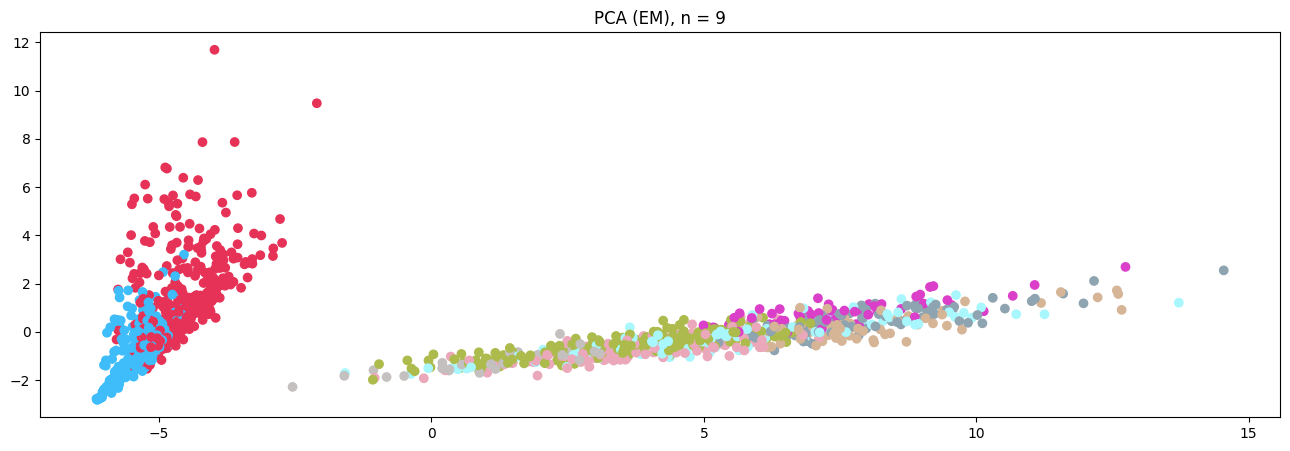

In [ ]:
n = 9
gm = GaussianMixture(n_components=n)
labels = gm.fit_predict(X)
df_labels = pd.DataFrame()
df_labels['Labels'] = labels

colors = np.sqrt(np.random.randint(0,255, size=(len(set(labels)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(labels))))

plt.figure(figsize=(16,5)); plt.title('PCA (EM), n = 9')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

In [ ]:
df = df_labels

In [ ]:
df_labels.shape

(1590, 1)

In [ ]:
df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]


data_sel9={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7,  7: df_8,  8: df_9}

In [ ]:
for i in data_sel9.values():
  print(len(i))

412
253
63
42
77
88
154
383
118


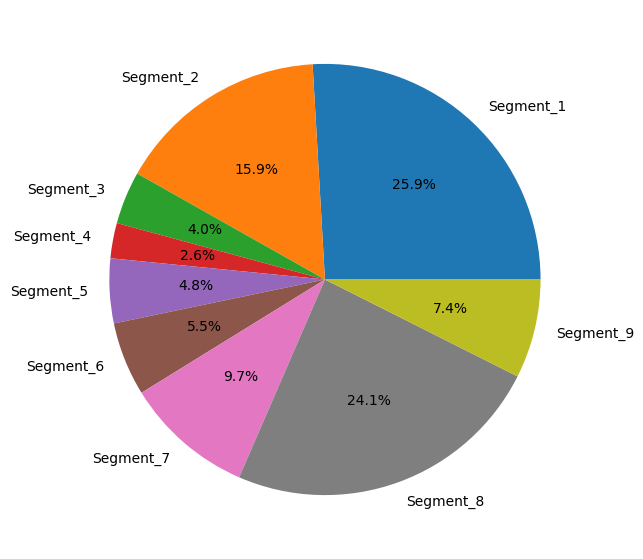

In [ ]:
fig = plt.figure(figsize =(10, 7))
data = [len(i) for i in data_sel9.values()]
labels = [('Segment_' + str(i)) for i in range(1, 10)]
plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

In [ ]:
X1['Labels'] = df_labels['Labels']

In [ ]:
X1

,Sales,Quantity,Discount,Profit,Shipping Cost,unit_price,Regular_price,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,...,Sub-Category_Supplies,Sub-Category_Tables,Category_Furniture,Category_Office Supplies,Category_Technology,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Labels
0,13747.41,145,4.35,447.69,1236.15,4111.39,4696.09,6,0,16,...,3,0,6,26,10,4,20,0,18,1
1,5884.20,139,7.00,677.48,903.92,2029.75,2413.56,15,3,9,...,1,1,11,27,4,9,22,2,9,1
2,17695.59,150,2.98,1516.48,1633.67,4268.63,4695.09,1,3,8,...,0,1,6,22,10,0,9,0,29,1
3,15343.89,267,9.19,3051.44,1752.27,3801.83,4348.61,22,6,12,...,2,0,12,46,15,10,27,6,30,2
4,2243.26,20,1.80,535.57,215.80,915.70,1172.07,1,0,1,...,0,0,1,5,2,0,1,0,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,18703.61,197,3.80,3091.59,1620.12,4921.33,5443.13,1,2,4,...,5,1,9,36,9,1,22,2,29,6
1586,7.17,1,0.70,-15.57,0.85,7.17,23.91,0,0,0,...,0,0,0,1,0,0,1,0,0,7
1587,28472.82,333,18.11,452.50,3077.97,6264.29,8535.93,12,0,9,...,2,2,15,51,18,7,25,10,42,5
1588,2951.23,55,1.30,478.42,360.74,1209.33,1405.08,1,3,8,...,0,0,2,10,6,0,15,0,3,0


In [ ]:
df_sum = X1.groupby('Labels').sum()

In [ ]:
df_sum.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'unit_price', 'Regular_price', 'Ship Mode_First Class',
       'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Region_Africa', 'Region_Canada',
       'Region_Caribbean', 'Region_Central', 'Region_Central Asia',
       'Region_EMEA', 'Region_East', 'Region_North', 'Region_North Asia',
       'Region_Oceania', 'Region_South', 'Region_Southeast Asia',
       'Region_West', 'Segment_Consumer', 'Segment_Corporate',
       'Segment_Home Office', 'Market_APAC', 'Market_Africa', 'Market_Canada',
       'Market_EMEA', 'Market_EU', 'Market_LATAM', 'Market_US',
       'Sub-Category_Accessories', 'Sub-Category_Appliances',
       'Sub-Category_Art', 'Sub-Category_Binders', 'Sub-Category_Bookcases',
       'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Envelopes',
       'Sub-Category_Fasteners', 'Sub-Category_Furnishings',
       'Sub-Category_Labels', 'Sub-Category_Machines

In [ ]:
df_sum['Category_Furniture'] = df_sum['Category_Furniture'] /df_sum['Quantity']
df_sum['Category_Office Supplies'] = df_sum['Category_Office Supplies'] /df_sum['Quantity']
df_sum['Category_Technology'] = df_sum['Category_Technology'] /df_sum['Quantity']
df_sum['Order Priority_Critical'] = df_sum['Order Priority_Critical'] /df_sum['Quantity']
df_sum['Order Priority_High'] = df_sum['Category_Office Supplies'] /df_sum['Quantity']
df_sum['Order Priority_Low'] = df_sum['Order Priority_Low'] /df_sum['Quantity']
df_sum['Order Priority_Medium'] = df_sum['Order Priority_Medium'] /df_sum['Quantity']
df_sum['Market_APAC'] = df_sum['Market_APAC'] /df_sum['Quantity']
df_sum['Market_Africa'] = df_sum['Market_Africa'] /df_sum['Quantity']
df_sum['Market_Canada'] = df_sum['Market_Canada'] /df_sum['Quantity']
df_sum['Market_EMEA'] = df_sum['Market_EMEA'] /df_sum['Quantity']
df_sum['Market_EU'] = df_sum['Market_EU'] /df_sum['Quantity']
df_sum['Market_LATAM'] = df_sum['Market_LATAM'] /df_sum['Quantity']
df_sum['Market_US'] = df_sum['Market_US'] /df_sum['Quantity']
df_sum['Segment_Consumer'] = df_sum['Segment_Consumer'] /df_sum['Quantity']
df_sum['Segment_Corporate'] = df_sum['Segment_Corporate'] /df_sum['Quantity']
df_sum['Segment_Home Office'] = df_sum['Segment_Home Office'] /df_sum['Quantity']

In [ ]:
df_sum.drop(['Region_Africa', 'Region_Canada',
       'Region_Caribbean', 'Region_Central', 'Region_Central Asia',
       'Region_EMEA', 'Region_East', 'Region_North', 'Region_North Asia',
       'Region_Oceania', 'Region_South', 'Region_Southeast Asia',
       'Region_West', 'Sub-Category_Accessories', 'Sub-Category_Appliances',
       'Sub-Category_Art', 'Sub-Category_Binders', 'Sub-Category_Bookcases',
       'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Envelopes',
       'Sub-Category_Fasteners', 'Sub-Category_Furnishings',
       'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper',
       'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_Supplies',
       'Sub-Category_Tables'], axis = 1, inplace = True)

In [ ]:
df_sum

,Sales,Quantity,Discount,Profit,Shipping Cost,unit_price,Regular_price,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,...,Market_EU,Market_LATAM,Market_US,Category_Furniture,Category_Office Supplies,Category_Technology,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
Labels,,,,,,,,,,,,,,,,,,,,,
0,1192290.93,15323,1213.00,89945.35,135813.45,516711.01,635016.51,1025,468,1359,...,0,0,0,979,4356,1319,600,1986,363,3705
1,2848802.59,43365,1560.24,333609.98,305918.77,771238.83,910828.38,1595,645,2410,...,2810,2995,2767,2374,6917,2275,842,3703,490,6531
2,1175962.85,14616,486.61,181954.15,130300.44,307423.53,358827.31,665,262,669,...,1144,900,667,677,2344,859,400,1210,214,2056
3,445795.37,5733,203.37,42774.14,43570.66,116561.33,144869.61,192,64,306,...,342,391,415,280,914,309,95,417,98,893
4,1403961.51,18769,650.40,183353.42,150467.34,372067.33,435611.69,694,215,992,...,1166,1245,1169,1038,2935,999,371,1376,296,2929
5,1567208.34,21828,870.34,150745.20,160304.17,412698.14,497933.94,885,233,1121,...,1200,1390,1712,1277,3430,1098,403,1698,267,3437
6,1873107.85,27258,990.16,220104.80,199718.88,505099.90,594235.55,1064,336,1501,...,1871,1742,1777,1518,4321,1400,532,2125,287,4295
7,464887.60,7595,492.50,60608.15,48139.06,227226.39,261510.09,424,118,717,...,0,0,0,465,2264,619,197,1052,97,2002
8,1670484.90,23825,862.26,204362.09,178587.92,446286.11,527072.12,961,360,1234,...,1467,1631,1487,1268,3792,1263,492,1934,312,3585


In [ ]:
df_sum.to_csv('clusterisation9.csv')

11 clusters

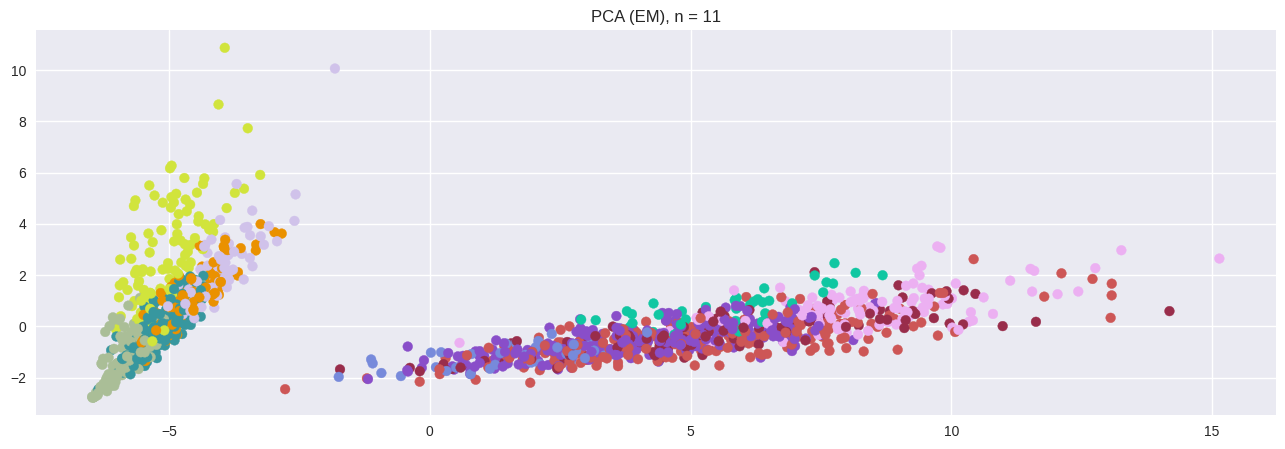

In [ ]:
n = 11
gm = GaussianMixture(n_components=n)
labels = gm.fit_predict(X)
df_labels = pd.DataFrame()
df_labels['Labels'] = labels

colors = np.sqrt(np.random.randint(0,255, size=(len(set(labels)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(labels))))

plt.figure(figsize=(16,5)); plt.title('PCA (EM), n = 11')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

In [ ]:
df = df_labels
df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]
df_10 = df[(df['Labels'] == 9)]
df_11 = df[(df['Labels'] == 10)]

data_sel11={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7, 7: df_8, 8: df_9, 9: df_10, 10: df_11}

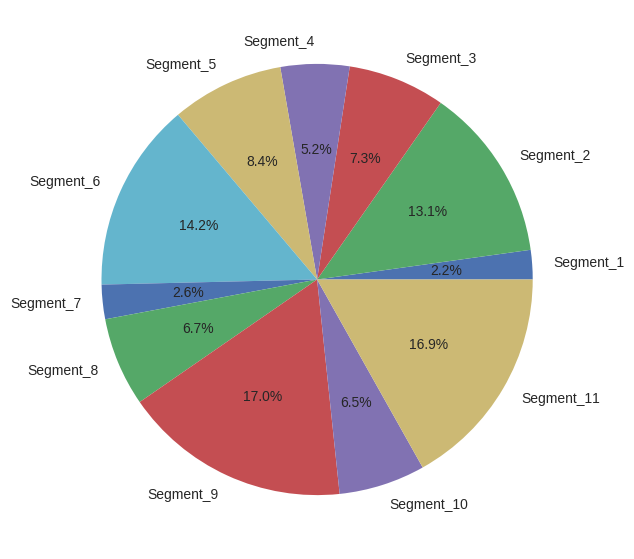

In [ ]:
fig = plt.figure(figsize =(10, 7))
data = [len(i) for i in data_sel11.values()]
labels = [('Segment_' + str(i)) for i in range(1, 12)]
plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

In [ ]:
X1['Labels'] = df_labels['Labels']

In [ ]:
X1

,Sales,Quantity,Discount,Profit,Shipping Cost,unit_price,Regular_price,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,...,Sub-Category_Supplies,Sub-Category_Tables,Category_Furniture,Category_Office Supplies,Category_Technology,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Labels
0,13747.41,145,4.35,447.69,1236.15,4111.39,4696.09,6,0,16,...,3,0,6,26,10,4,20,0,18,6
1,5884.20,139,7.00,677.48,903.92,2029.75,2413.56,15,3,9,...,1,1,11,27,4,9,22,2,9,8
2,17695.59,150,2.98,1516.48,1633.67,4268.63,4695.09,1,3,8,...,0,1,6,22,10,0,9,0,29,8
3,15343.89,267,9.19,3051.44,1752.27,3801.83,4348.61,22,6,12,...,2,0,12,46,15,10,27,6,30,7
4,2243.26,20,1.80,535.57,215.80,915.70,1172.07,1,0,1,...,0,0,1,5,2,0,1,0,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,18703.61,197,3.80,3091.59,1620.12,4921.33,5443.13,1,2,4,...,5,1,9,36,9,1,22,2,29,5
1586,7.17,1,0.70,-15.57,0.85,7.17,23.91,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1587,28472.82,333,18.11,452.50,3077.97,6264.29,8535.93,12,0,9,...,2,2,15,51,18,7,25,10,42,7
1588,2951.23,55,1.30,478.42,360.74,1209.33,1405.08,1,3,8,...,0,0,2,10,6,0,15,0,3,4


In [ ]:
df_sum = X1.groupby('Labels').sum()

In [ ]:
df_sum

,Sales,Quantity,Discount,Profit,Shipping Cost,unit_price,Regular_price,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,...,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Category_Furniture,Category_Office Supplies,Category_Technology,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
Labels,,,,,,,,,,,,,,,,,,,,,
0,494557.36,7149,249.81,51304.21,62132.37,132686.56,159470.12,366,173,394,...,185,79,41,353,1184,328,354,540,50,921
1,172862.38,3115,215.70,20018.71,17286.84,90314.06,104332.59,143,47,273,...,193,47,0,206,939,258,38,435,62,868
2,1635643.30,23296,839.09,200105.82,172461.39,436578.89,514664.22,919,335,1184,...,533,326,116,1242,3690,1242,461,1863,317,3533
3,288174.74,4068,353.20,12584.74,31250.60,125871.47,157150.20,313,132,310,...,231,86,12,265,1186,321,183,504,110,975
4,379539.92,5001,355.80,46333.28,43063.98,169082.14,198890.55,335,202,340,...,284,89,16,288,1456,444,148,624,203,1213
5,3178266.09,44604,1598.00,402761.18,336264.47,851537.77,998105.96,1658,525,2402,...,1085,606,249,2486,7040,2332,811,3387,571,7089
6,452033.55,5672,204.69,28868.62,44663.28,117060.93,148601.30,203,77,315,...,156,66,22,276,915,314,75,447,86,897
7,1921516.66,26435,999.62,222446.43,205568.42,504965.07,601339.73,1149,339,1340,...,647,331,122,1427,4191,1392,654,2070,365,3921
8,3303306.45,48238,1732.17,411417.52,347778.25,888545.95,1047197.27,1761,666,2598,...,1171,549,227,2648,7633,2595,780,4156,575,7365


In [ ]:
df_sum['Order Priority_Critical']

,Order Priority_Critical,Order Priority_Critical
Labels,,
0,354,354
1,38,38
2,461,461
3,183,183
4,148,148
5,811,811
6,75,75
7,654,654
8,780,780


In [ ]:
df_sum.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'unit_price', 'Regular_price', 'Ship Mode_First Class',
       'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Region_Africa', 'Region_Canada',
       'Region_Caribbean', 'Region_Central', 'Region_Central Asia',
       'Region_EMEA', 'Region_East', 'Region_North', 'Region_North Asia',
       'Region_Oceania', 'Region_South', 'Region_Southeast Asia',
       'Region_West', 'Order Priority_Critical', 'Order Priority_High',
       'Order Priority_Low', 'Order Priority_Medium', 'Segment_Consumer',
       'Segment_Corporate', 'Segment_Home Office', 'Market_APAC',
       'Market_Africa', 'Market_Canada', 'Market_EMEA', 'Market_EU',
       'Market_LATAM', 'Market_US', 'Sub-Category_Accessories',
       'Sub-Category_Appliances', 'Sub-Category_Art', 'Sub-Category_Binders',
       'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers',
       'Sub-Category_Envelopes', 'S

In [ ]:
df_sum['Category_Furniture'] = df_sum['Category_Furniture'] /df_sum['Quantity']
df_sum['Category_Office Supplies'] = df_sum['Category_Office Supplies'] /df_sum['Quantity']
df_sum['Category_Technology'] = df_sum['Category_Technology'] /df_sum['Quantity']
df_sum['Order Priority_Critical'] = df_sum['Order Priority_Critical'] /df_sum['Quantity']
df_sum['Order Priority_High'] = df_sum['Category_Office Supplies'] /df_sum['Quantity']
df_sum['Order Priority_Low'] = df_sum['Order Priority_Low'] /df_sum['Quantity']
df_sum['Order Priority_Medium'] = df_sum['Order Priority_Medium'] /df_sum['Quantity']
df_sum['Market_APAC'] = df_sum['Market_APAC'] /df_sum['Quantity']
df_sum['Market_Africa'] = df_sum['Market_Africa'] /df_sum['Quantity']
df_sum['Market_Canada'] = df_sum['Market_Canada'] /df_sum['Quantity']
df_sum['Market_EMEA'] = df_sum['Market_EMEA'] /df_sum['Quantity']
df_sum['Market_EU'] = df_sum['Market_EU'] /df_sum['Quantity']
df_sum['Market_LATAM'] = df_sum['Market_LATAM'] /df_sum['Quantity']
df_sum['Market_US'] = df_sum['Market_US'] /df_sum['Quantity']
df_sum['Segment_Consumer'] = df_sum['Segment_Consumer'] /df_sum['Quantity']
df_sum['Segment_Corporate'] = df_sum['Segment_Corporate'] /df_sum['Quantity']
df_sum['Segment_Home Office'] = df_sum['Segment_Home Office'] /df_sum['Quantity']

# DBScan (not needed)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=7)
neighbors_fit = neighbors.fit(add_data5)
distances, indices = neighbors_fit.kneighbors(add_data5)

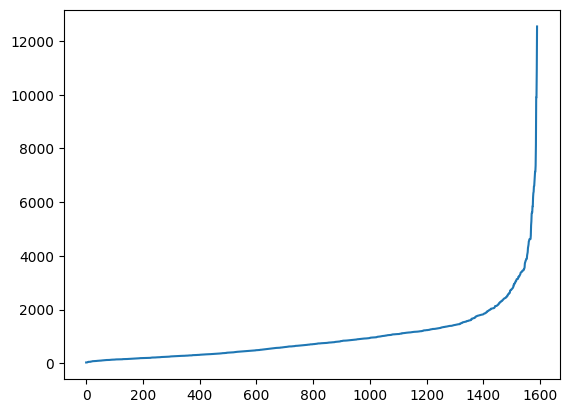

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

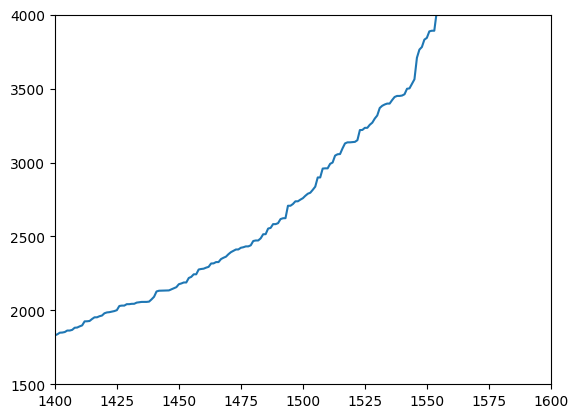

In [ ]:
plt.xlim(1400, 1600)
plt.ylim(1500,4000)
plt.plot(distances)

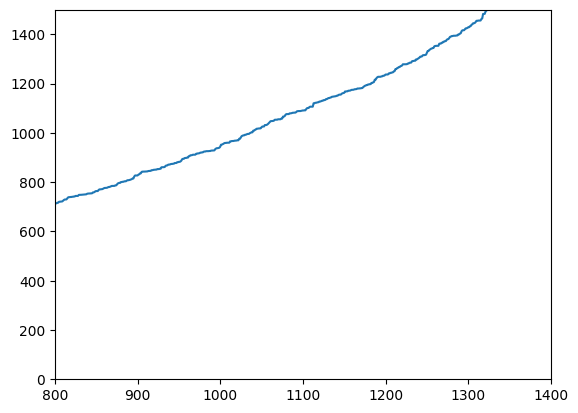

In [ ]:
plt.xlim(800, 1400)
plt.ylim(0,1500)
plt.plot(distances)

In [ ]:
from collections import Counter

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
clustering = DBSCAN(eps=2000, min_samples=7).fit(add_data5)
DBSCAN_dataset = add_data5.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_

In [ ]:
Counter(clustering.labels_ )

Counter({-1: 599,
         0: 56,
         1: 50,
         2: 44,
         3: 29,
         4: 15,
         5: 30,
         35: 14,
         6: 40,
         7: 51,
         8: 63,
         23: 17,
         9: 22,
         10: 31,
         11: 45,
         12: 16,
         13: 33,
         14: 44,
         15: 45,
         16: 18,
         37: 7,
         38: 7,
         17: 12,
         26: 23,
         36: 7,
         18: 43,
         19: 18,
         20: 20,
         33: 12,
         21: 18,
         22: 32,
         24: 7,
         25: 7,
         41: 8,
         27: 14,
         28: 16,
         29: 8,
         30: 14,
         31: 17,
         32: 11,
         34: 9,
         39: 10,
         40: 8})

([<matplotlib.patches.Wedge at 0x784608f38880>,
 [Text(-0.11086310564440237, 1.0943990916511575, '-1'),
  Text(0.04877833313707217, -1.0989179560897024, '0'),
  Text(1.0959587380382019, -0.09420427016708062, '1'),
  Text(1.0985969243496796, -0.05554095614431596, '2'),
  Text(1.0992151129617358, -0.04154678611539737, '3'),
  Text(1.0995417889135775, -0.03174672318098265, '4'),
  Text(1.0997841880058257, -0.02178852478637851, '5'),
  Text(1.0999108112988467, -0.014007397613870022, '6'),
  Text(1.099975677003884, -0.007315052962721991, '7'),
  Text(1.099999108257354, -0.001400654499263559, '8')])

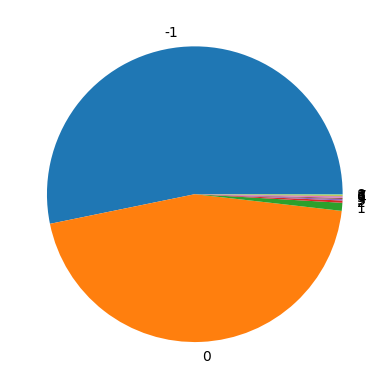

In [ ]:
unique, counts = np.unique(clustering.labels_, return_counts=True)
fig, ax = plt.subplots()
ax.pie(counts, labels=unique)

In [ ]:
data['Sub-Category'].unique().size

17

In [ ]:
data_small_kmeans = data[['Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']].copy()
one_hot_encoded_data_sm = pd.get_dummies(data_small_kmeans, columns = ['Sub-Category'])
one_hot_encoded_data_sm

,Sales,Quantity,Discount,Profit,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,2309.650,7.0,0.0,762.1845,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3709.395,9.0,0.1,-288.7650,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,5175.171,9.0,0.1,919.9710,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2892.510,5.0,0.1,-96.5400,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2832.960,8.0,0.0,311.5200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22198,79.872,3.0,0.2,29.9520,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
22199,51.630,1.0,0.0,8.7600,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22200,123.240,2.0,0.0,52.9800,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
22201,258.240,4.0,0.2,12.8800,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(one_hot_encoded_data_sm)
    kmeanModel.fit(one_hot_encoded_data_sm)

    distortions.append(sum(np.min(cdist(one_hot_encoded_data_sm, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / one_hot_encoded_data_sm.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(one_hot_encoded_data_sm, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / one_hot_encoded_data_sm.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 423.0764477164437
2 : 297.3058334690732
3 : 240.8135472539527
4 : 224.16591757293872
5 : 189.8359622353509
6 : 180.77511964960874
7 : 174.8559820048743
8 : 156.66770498855024
9 : 155.80073832871585
10 : 148.68627677524964
11 : 137.54684774385348
12 : 135.3713087255537
13 : 129.8800349661941
14 : 128.9005070951409
15 : 120.08680945019154
16 : 116.03987004115558
17 : 112.28773334969321
18 : 117.10062345012382
19 : 109.9245560329562


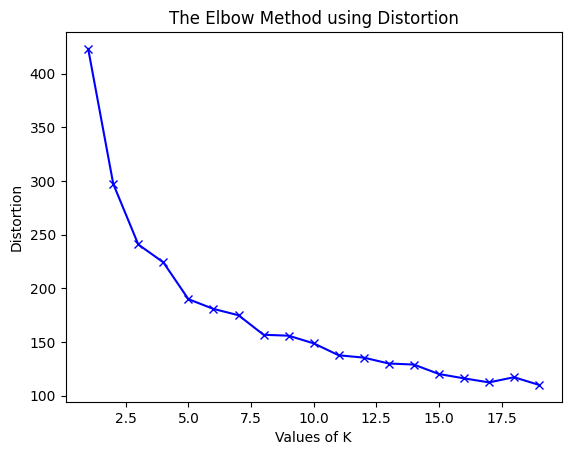

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=8).fit(one_hot_encoded_data_sm)
kmeanModel.fit(one_hot_encoded_data_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [ ]:
from collections import Counter
Counter(kmeanModel.labels_)

Counter({1: 925, 5: 393, 4: 67, 3: 7, 6: 198, 2: 2375, 7: 5538, 0: 12700})

([<matplotlib.patches.Wedge at 0x7e8c28059d50>,
 [Text(-0.2466802625283807, 1.0719836043890454, '0'),
  Text(-0.9181518065597294, -0.6058029878690807, '1'),
  Text(-0.5471669437779675, -0.9542580026579178, '2'),
  Text(-0.20081487004736306, -1.0815143956359807, '3'),
  Text(-0.18948000733494, -1.083557717346128, '4'),
  Text(-0.11860276989291149, -1.093587391557588, '5'),
  Text(-0.026845824942780788, -1.0996723610617583, '6'),
  Text(0.7792194201434128, -0.7764129669649804, '7')])

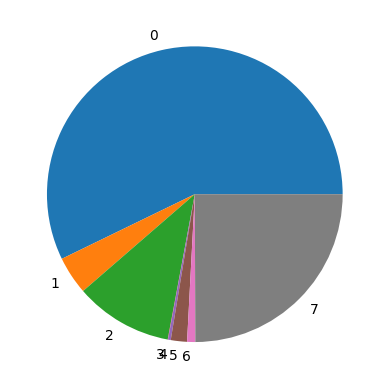

In [ ]:
unique, counts = np.unique(kmeanModel.labels_, return_counts=True)
fig, ax = plt.subplots()
ax.pie(counts, labels=unique)

In [ ]:
kmeanModel = KMeans(n_clusters=5).fit(one_hot_encoded_data_sm)
kmeanModel.fit(one_hot_encoded_data_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
Counter(kmeanModel.labels_)

Counter({1: 1618, 2: 433, 4: 12, 3: 5119, 0: 15021})

([<matplotlib.patches.Wedge at 0x7e8c280910f0>,
 [Text(-0.5792504648717122, 0.9351304181481349, '0'),
  Text(-0.2536523311077631, -1.0703553124657241, '1'),
  Text(0.06323406572895807, -1.0981809745808684, '2'),
  Text(0.8213738765116938, -0.7316727102907099, '3'),
  Text(1.099998414180698, -0.0018678329554735178, '4')])

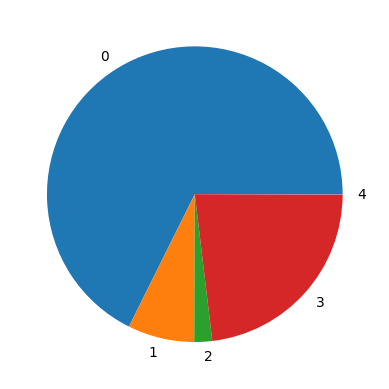

In [ ]:
unique, counts = np.unique(kmeanModel.labels_, return_counts=True)
fig, ax = plt.subplots()
ax.pie(counts, labels=unique)